In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('./data/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [5]:
df.columns = ['KOUS']

In [8]:
df['KOUS'].replace('.', '', inplace=True)

In [9]:
df['KOUS'] = pd.to_numeric(df['KOUS'])

In [13]:
df.fillna(method='ffill', inplace=True)

# 연도별

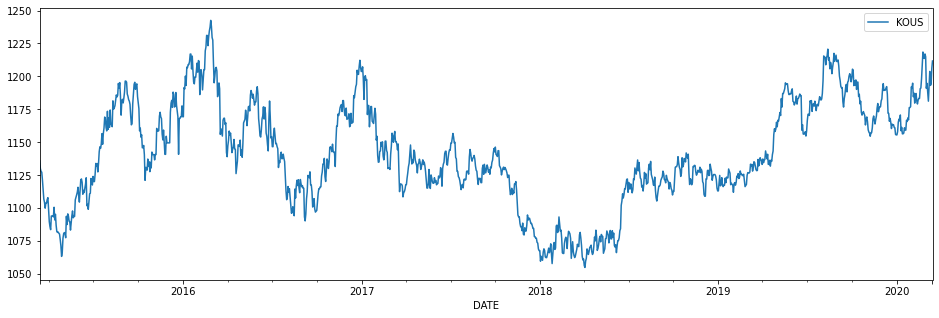

In [14]:
df.plot(figsize=(16, 5))

In [15]:
df_w = df.resample('W-Fri').last()

In [21]:
df_2017 = df_w[df_w.index.year == 2017]
df_2019 = df_w[df_w.index.year == 2019]

df_2017.head(), df_2019.head()

(               KOUS
 DATE               
 2017-01-06  1198.85
 2017-01-13  1177.81
 2017-01-20  1177.03
 2017-01-27  1175.73
 2017-02-03  1134.65,
                KOUS
 DATE               
 2019-01-04  1116.73
 2019-01-11  1117.18
 2019-01-18  1122.80
 2019-01-25  1117.58
 2019-02-01  1118.31)

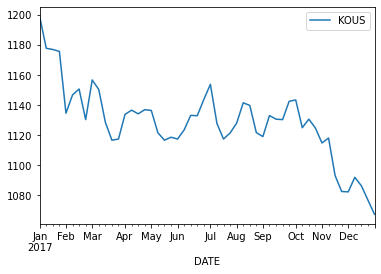

In [22]:
df_2017.plot()

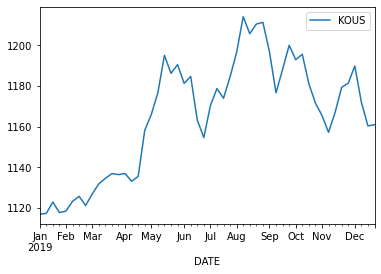

In [24]:
df_2019.plot() # 외부충격이 강한사례

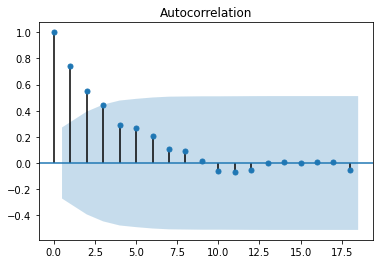

In [26]:
plot_acf(df_2017)
plt.show()

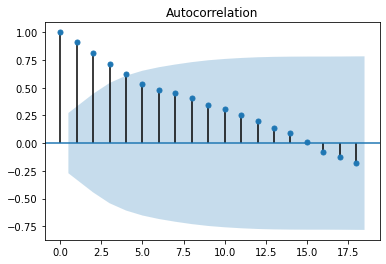

In [28]:
plot_acf(df_2019)
plt.show()

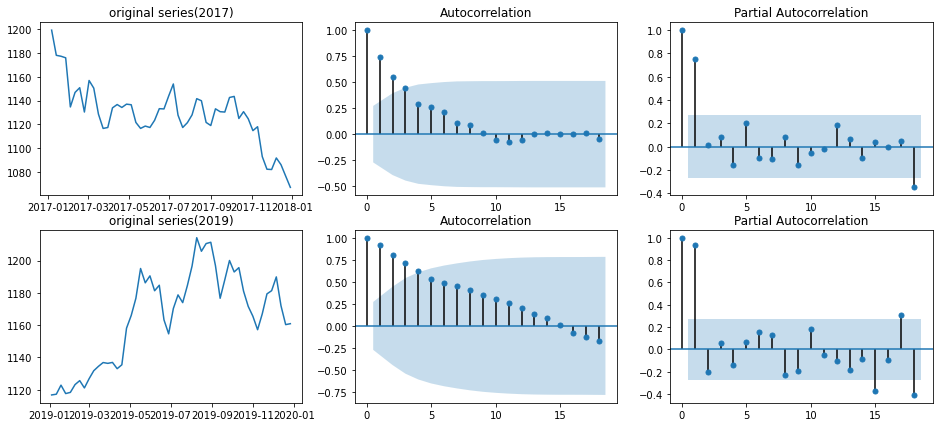

In [38]:
# 첫번째 행 : 2017년 데이터의 원계열, ACF, PACF
# 두번째 행 : 2019년 데이터의 원계열, ACF, PACF

figure, axes = plt.subplots(2, 3, figsize=(16, 7))

axes[0, 0].plot(df_2017)
axes[0, 0].set_title('original series(2017)')

axes[1, 0].plot(df_2019)
axes[1, 0].set_title('original series(2019)')

plot_acf(df_2017, ax=axes[0, 1])
plot_acf(df_2019, ax=axes[1, 1])

plot_pacf(df_2017, ax=axes[0, 2])
plot_pacf(df_2019, ax=axes[1, 2])

plt.show()


2017년은 전형적인 AR 1 모델
완만하게 떨어지는 편이다.

2019년은 

- 2017년에 비해 2019년은 외부 충격이 오래 지속되었다. 3~4주
- 2017년에는 외부 충격이 다음 기에 0.75 남아있지만 2019년기에는 0.9 남았다. (persistency가 증가하고 있다.)
--> 가입자, 사용자 마케팅 효과 분석
--> 주가지수, 환율 : 외부 충격이 얼마나 오래 지속되는가
